<a href="https://colab.research.google.com/github/daveking63/Jupyter-iPython-Notebooks-Deep-Learning-Notes/blob/master/DLPython2ndCh4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Notes from Deep Learning with Python 2nd Edition - Chapter 4

## Getting Started with Neural Networks: Classification and Regression

### Classifying Movie Reviews: Binary classification

Classifying reviews as positive or negative based on text content of reviews. Based on IMDB data set of 50K highly polarized reviews. The 50K are split in 25K for training and 25K for testing, with each set containing 50% negative and 50% positive reviews.

Within each review only the top 10K words (in the training sample) were used as input to the binary classification model.  Keras and TensorFlow are used to build the model from these data.

In [5]:
# Loading the IMDB dataset

import tensorflow as tf
import tensorflow.keras

from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

1

In [77]:
# Analysis of the datasets shows, the training_data is a numpy array 
# of 25K samples or reviews. Each review is a list of numbers where 
# the number indicates the index of the word index dictionary 

print(type(train_data))
print(type(train_data[0]))
print(train_data.shape)
print(train_labels.shape)
print(len(train_data[0]),'numbers in first review')

print(train_data[0:3])
print(train_labels[0])

<class 'numpy.ndarray'>
<class 'list'>
(25000,)
(25000,)
218 numbers
[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345

In [10]:
# restricting to top 10K most frequent words

max([max(sequence) for sequence in train_data])

9999

In [0]:
# Reverse decoding from word index to actual words

word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decode_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [76]:
print(type(word_index),'\n')

for dKey in list(word_index.keys())[0:5]:
  print(dKey, word_index[dKey])

print('\n')

print(type(reverse_word_index),'\n')

for dKey in list(reverse_word_index.keys())[0:5]:
  print(dKey, reverse_word_index[dKey])

print('\n')

# print decode_review for single review train_data[0]

print(type(decode_review))
print(len(decode_review), ' characters')
print(decode_review)

<class 'dict'> 

fawn 34701
tsukino 52006
nunnery 52007
sonja 16816
vani 63951


<class 'dict'> 

34701 fawn
52006 tsukino
52007 nunnery
16816 sonja
63951 vani


<class 'str'>
1113  characters
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the 

As the data now stands, the samples or reviews are all of different length. However, neural networks expect to 'process contiguous batches of data.' Meaning that the lists need to be converted to tensors.  There are multiple ways of doing this.  However, the scheme to be used in this model is to use 'one-hot encoding' so the lists are turned into a 10K dimensional vector of 1s and 0s where a 1 indicates that a particular word in the 10K list appears in the review, while a 0 indicates it doesn't.

The one-hot encoding is carried out in the code that follows:

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
  
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [80]:
print(type(x_train))
print(x_train.shape)
print(x_train[0])

<class 'numpy.ndarray'>
(25000, 10000)
[0. 1. 1. ... 0. 0. 0.]


In [0]:
# need to also vectorize the labels

y_train =np.asarray(train_labels).astype('float32')
y_test =np.asarray(test_labels).astype('float32')

### Building the Model

Both input and output labels are all 0s and 1s. Simple problem where a 'plain stack of densely-connected (Dense) layers with relu activations' works well.

Two key questions:

*   How many layers?
*   How many units per layer?

As a start, we'll use

*   2 intermediate layers with 16 units each
*   3rd layer that will output a scaler prediction regarding overall sentiment of the review


In [0]:
import tensorflow as tf
import tensorflow.keras

model = keras.Sequential([
  keras.layers.Dense(16, activation='relu'),
  keras.layers.Dense(16, activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')
])

# compiling the model
# selects optimizer, loss and metrics. The loss in this case is used in place of
# MSE because the output from model is probabilities

model.compile(optimizer='rmsprop',
  loss='binary_crossentropy',
  metrics=['accuracy'])

In [92]:
# Validating the approach

# set aside validation set

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Then train the model

model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 70ms/step - loss: 0.5457 - acc: 0.7639 - val_loss: 0.4442 - val_acc: 0.8603
Epoch 2/20
30/30 [==============================] - 1s 41ms/step - loss: 0.3619 - acc: 0.8977 - val_loss: 0.3513 - val_acc: 0.8758
Epoch 3/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2661 - acc: 0.9251 - val_loss: 0.2981 - val_acc: 0.8906
Epoch 4/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2104 - acc: 0.9399 - val_loss: 0.2809 - val_acc: 0.8899
Epoch 5/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1678 - acc: 0.9508 - val_loss: 0.2834 - val_acc: 0.8855
Epoch 6/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1378 - acc: 0.9597 - val_loss: 0.2803 - val_acc: 0.8858
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1135 - acc: 0.9680 - val_loss: 0.2906 - val_acc: 0.8850
Epoch 8/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0949 - a

In [94]:
# The model.fit returns a history objects that can be used to look at both the history as well as the accuracy and loss of the m odel

hist_dict = history.history
hist_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

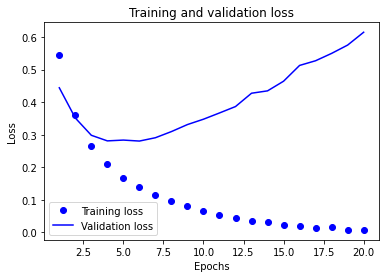

In [95]:
# Plotting training and validation loss

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

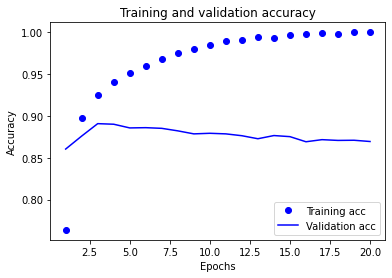

In [96]:
# Plotting training and validation accuracy

plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [98]:
# the validation loss and accuracy peak at 3-4 epochs. Sign of overfitting
# retraining a second model from scratch with 4 rather than 20 epochs

model = keras.Sequential([
  keras.layers.Dense(16, activation='relu'),
  keras.layers.Dense(16, activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
  loss='binary_crossentropy',
  metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

print('\n', 'Results:')
print(results)

Epoch 1/4
49/49 [==============================] - 1s 25ms/step - loss: 0.4467 - accuracy: 0.8129
Epoch 2/4
49/49 [==============================] - 1s 25ms/step - loss: 0.2547 - accuracy: 0.9114
Epoch 3/4
49/49 [==============================] - 1s 24ms/step - loss: 0.1964 - accuracy: 0.9322
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.3149 - accuracy: 0.8778

 Results:
[0.31486085057258606, 0.8777599930763245]


In [99]:
# Generating predictions from trained model

model.predict(x_test)

array([[0.17713636],
       [0.9977534 ],
       [0.3756293 ],
       ...,
       [0.07270792],
       [0.03277761],
       [0.41550398]], dtype=float32)

### Classifying Newswires: Multiclass Classification Example

Building a model to classify Reuters newswires into 46 mutually exclusive topics. This is a problem of 'single-label', 'multiclass classification' since newswire stories can only belong to one topic or category.

The dataset to be used is a set of short newswires and their topics published in 1986 by Reuters. This is a simple, widely used toy dataset. There are 46 different topics with at least 10 examples of each topic in the training set.

In [100]:
#load reuters dataset

from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [106]:
print('train_data')
print(type(train_data))
print(train_data.shape)
print(len(train_data))
print(train_data[10])

print('\n','test_data:')
print(type(test_data))
print(test_data.shape)
print(len(test_data))
print(test_data[10])

train_data
<class 'numpy.ndarray'>
(8982,)
8982
[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]

 test_data:
<class 'numpy.ndarray'>
(2246,)
2246
[1, 361, 372, 8, 77, 62, 325, 4105, 336, 5, 1605, 37, 412, 453, 1187, 229, 334, 13, 4, 867, 76, 4, 76, 1726, 6, 264, 2337, 18, 82, 95, 97, 2220, 4, 1004, 649, 18, 82, 554, 136, 4, 143, 334, 290, 126, 5, 4, 2820, 777, 2, 1386, 13, 954, 7, 4, 314, 912, 224, 4, 2370, 1128, 54, 429, 2, 18, 82, 5, 496, 1187, 229, 57, 85, 385, 593, 6, 4, 867, 76, 17, 12]


In [107]:
# decoding newswires back to text

word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decode_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

557056/550378 [==============================] - 0s 0us/step


In [113]:
print('word_index:')

print(type(word_index),'\n')

print(len(word_index), 'dictionary items\n')



for dKey in list(word_index.keys())[0:5]:
  print(dKey, word_index[dKey])

print('\n','reverse_word_index:')

print(type(reverse_word_index),'\n')

for dKey in list(reverse_word_index.keys())[0:5]:
  print(dKey, reverse_word_index[dKey])

print('\n')

# print decode_review for single review train_data[0]

print(type(decode_review))
print(len(decode_review), ' characters')
print(decode_review)

word_index:
<class 'dict'> 

30979 dictionary items

mdbl 10996
fawc 16260
degussa 12089
woods 8803
hanging 13796

 reverse_word_index:
<class 'dict'> 

10996 mdbl
16260 fawc
12089 degussa
8803 woods
13796 hanging


<class 'str'>
389  characters
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [0]:
# prepare data -- encode in same fashion as movie reviews

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
# encode topic labels for newswires

def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results
  
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [0]:
# Building the model - similar to movie review classification except
# there are now 46 topics versus 2 types of reviews (+,-)
# Larger layers are required (in this case somewhat arbitrarily set at 64).

model = keras.Sequential([
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(46, activation='softmax')
])

model.compile(optimizer='rmsprop',
  loss='categorical_crossentropy',
  metrics=['accuracy'])


In [0]:
# create validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [118]:
# training the model

history = model.fit(partial_x_train,
  partial_y_train,
  epochs=20,
  batch_size=512,
  validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 46ms/step - loss: 2.7410 - accuracy: 0.4826 - val_loss: 1.7968 - val_accuracy: 0.6170
Epoch 2/20
16/16 [==============================] - 1s 40ms/step - loss: 1.4460 - accuracy: 0.6986 - val_loss: 1.3162 - val_accuracy: 0.7130
Epoch 3/20
16/16 [==============================] - 1s 41ms/step - loss: 1.0515 - accuracy: 0.7719 - val_loss: 1.1315 - val_accuracy: 0.7490
Epoch 4/20
16/16 [==============================] - 1s 40ms/step - loss: 0.8162 - accuracy: 0.8259 - val_loss: 1.0378 - val_accuracy: 0.7760
Epoch 5/20
16/16 [==============================] - 1s 40ms/step - loss: 0.6484 - accuracy: 0.8682 - val_loss: 0.9668 - val_accuracy: 0.7970
Epoch 6/20
16/16 [==============================] - 1s 39ms/step - loss: 0.5190 - accuracy: 0.8959 - val_loss: 0.9804 - val_accuracy: 0.7880
Epoch 7/20
16/16 [==============================] - 1s 40ms/step - loss: 0.4214 - accuracy: 0.9128 - val_loss: 0.9140 - val_accuracy: 0.8110
Epoch 8/20
16

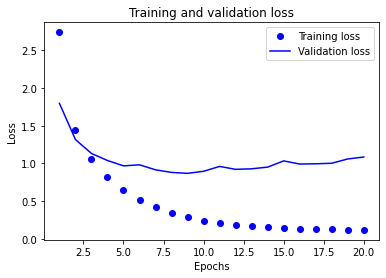

In [119]:
# Plotting training and validation loss

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

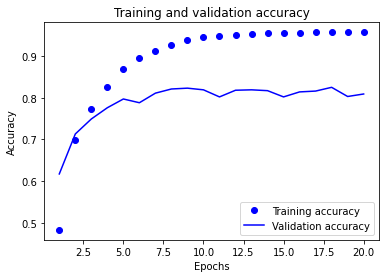

In [120]:
# Plotting training and validation accuracy

plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [121]:
# Begins to overfit after 9 epochs.  So, new test with 9 epochs

model = keras.Sequential([
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(46, activation='softmax')
])

model.compile(optimizer='rmsprop',
  loss='categorical_crossentropy',
  metrics=['accuracy'])

model.fit(partial_x_train,
  partial_y_train,
  epochs=9,
  batch_size=512,
  validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 47ms/step - loss: 2.7353 - accuracy: 0.5603 - val_loss: 1.8041 - val_accuracy: 0.6480
Epoch 2/9
16/16 [==============================] - 1s 40ms/step - loss: 1.4370 - accuracy: 0.7176 - val_loss: 1.3223 - val_accuracy: 0.7090
Epoch 3/9
16/16 [==============================] - 1s 39ms/step - loss: 1.0203 - accuracy: 0.7898 - val_loss: 1.1167 - val_accuracy: 0.7550
Epoch 4/9
16/16 [==============================] - 1s 41ms/step - loss: 0.8030 - accuracy: 0.8297 - val_loss: 1.0175 - val_accuracy: 0.7760
Epoch 5/9
16/16 [==============================] - 1s 39ms/step - loss: 0.6324 - accuracy: 0.8663 - val_loss: 0.9481 - val_accuracy: 0.7980
Epoch 6/9
16/16 [==============================] - 1s 39ms/step - loss: 0.5097 - accuracy: 0.8931 - val_loss: 0.9045 - val_accuracy: 0.8080
Epoch 7/9
16/16 [==============================] - 1s 40ms/step - loss: 0.4123 - accuracy: 0.9147 - val_loss: 0.8910 - val_accuracy: 0.8080
Epoch 8/9
16/16 [===

In [122]:
print(results) close to 80% accuracy

[1.0030885934829712, 0.7818343639373779]


In [123]:
# versus random classifier -- as you'll see random classifier has
# ~18% classification accuracy

import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.18432769367764915

In [129]:
# generating predictions for new data

predictions = model.predict(x_test)

print(predictions[0].shape)
print(np.sum(predictions[0]))
print(np.argmax(predictions[0]))

(46,)
0.99999994
3


### Predicting House Prices: Regression Example

Predict median price of homes in given boston Suburb in mid-1970s. Dataset has 404 training and 102 test samples. Each feature in the set has a difference scale. Need to normalize these features.

In [130]:
# Load dataset 

from tensorflow.keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [135]:
print('train_data:')
print(type(train_data))
print(train_data.shape)
print(train_data[0])

print('\n', 'train_targets:')
print(type(train_targets))
print(train_targets.shape)
print(train_targets[0])

train_data:
<class 'numpy.ndarray'>
(404, 13)
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]

 train_targets:
<class 'numpy.ndarray'>
(404,)
15.2


In [137]:
# prepare the data - normalizing

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

print(train_data[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]


In [0]:
#Build model with intermediate layers with 64 units each

def build_model():
  model = keras.Sequential([
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
  ])
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [140]:
# Because of sample size going to use k-fold cross-validation.
# Split data in K-Fold (usually 4 or 5) partitions.

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
  print('processing fold #%d' % i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
    train_data[(i + 1) * num_val_samples:]],
    axis=0)
  partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
    train_targets[(i + 1) * num_val_samples:]],
    axis=0)

  model = build_model()
  model.fit(partial_train_data, partial_train_targets,
    epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)


print('All Scores:', all_scores)
print('Mean Score:', np.mean(all_scores))

processing fold #0
processing fold #1
processing fold #2
processing fold #3
All Scores: [2.241654872894287, 2.553886890411377, 2.6020946502685547, 2.357145071029663]
Mean Score: 2.4386953711509705


Scores are off on the average by approximately \$2400 where prices range from \$10K-$50K.

In [141]:
# Let's try 500 epochs.

num_epochs = 500
all_mae_histories = []
for i in range(k):
  print('processing fold #%d' % i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
    train_data[(i + 1) * num_val_samples:]],
    axis=0)
  partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
    train_targets[(i + 1) * num_val_samples:]],
    axis=0)
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets,
    validation_data=(val_data, val_targets),
    epochs=num_epochs, batch_size=1, verbose=0)
  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history)

processing fold #0
processing fold #1
processing fold #2
processing fold #3


In [0]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

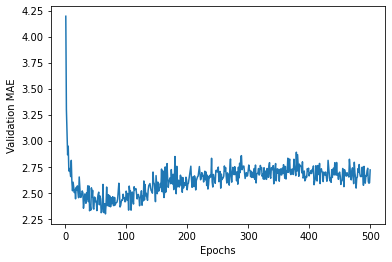

In [143]:
# plot validation scores

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

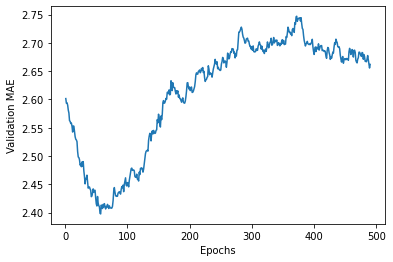

In [144]:
# plot smoothese validation scores excluding first 10 data points

def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [147]:
# training the final model - still off by sizeable amount 

model = build_model()
model.fit(train_data, train_targets,
  epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

print('test_mae_score:', test_mae_score)

4/4 [==============================] - 0s 2ms/step - loss: 31.9525 - mae: 2.6661
test_mae_score: 2.6661412715911865


In [148]:
# generate predictions with model

predictions = model.predict(test_data)

print(predictions[0])

[7.538241]
